# Description:

The objective of this project is Analysing the Impact of Corruption on Food Security: A Study of the Relationship Between Corruption Index and Global Hunger Index (GHI) (SDG 2: Hunger & SGD: 16: Corruption) and predict the level of hunger severity based on the GHI ranging. The two datasets consist of predictors (Independent) variables and one target variable that we got when we "Rank_in_2022" variable will converted the ranks into classes (e.g., low: Well-nourished countries, medium: Moderately nourished countries, high: Severely nourished countries), (Rank_Class). Predictor variables include Corruption Index, Annual Income, Year_2000, Year_2007, Year_2014, Year_2022, and Rank_Clas
.

1. Dataset A url : https://www.kaggle.com/datasets/omarsobhy14/global-hunger-indexse
   
2. Dataset B url : https://www.kaggle.com/datasets/meeratif/a-worldwide-ranking-of-corruption

### Name of the columns with their meanings

1) Country: This column contains the names or labels of various countries or regions.<br> 
2) Corruption Index: A numerical value or index quantifying the level of corruption within each country<br> 
3) Annual Income: Represents average annual income or income per capita for each country<br> 
4) Year_2000, Year_2007, Year_2014, Year_2022: GHI values for specific years<br> 
5) Rank_in_2022: The GHI ranking for each country in 2022<br>
6) Absolute change since 2014, Percent change since 2014: Indicate changes in GHI since 2014

# Step 1 : Importing all the relevant libraries for the Porject

In [1]:
## Visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from matplotlib import pyplot
from pylab import rcParams
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import lightgbm as lgb
from numpy.random import normal, seed
from pandas.plotting import autocorrelation_plot

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import math
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time
from sklearn.preprocessing import StandardScaler as sc

#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, roc_auc_score
import random

#from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore') 

plt.style.use('fivethirtyeight')

print ('import completed')

import completed


# Step2 : Load the two Datasets

In [2]:
df1 = pd.read_csv('corruption.csv')
df2 = pd.read_csv('Dataset.csv')

print ('loading of datasets completed')

loading of datasets completed


In [3]:
df1.shape

(113, 3)

In [4]:
df2.shape

(129, 8)

In [5]:
df1.columns

Index(['Country', 'Corruption index', 'Annual income'], dtype='object')

In [6]:
df2.columns

Index(['Rank_in_2022', 'Country', 'Year_2000', 'Year_2007', 'Year_2014',
       'Year_2022', 'Absolute change since 2014', 'Percent change since 2014'],
      dtype='object')

# Step3 : Mering the two Datasets

In [7]:
# Merge the datasets on the 'Country' column
df_merged = pd.merge(df1, df2, on='Country')

# Step 4 : Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being useLL values<br>

In this step, we will perform the below operationt:

4.1) Understanding Your Variablesiabl
- 4.1.1) Head of the dataset
- 4.1.2) The shape of the dataset
- 4.1.3) List types of all columns
- 4.1.4) Info of the dataset
- 4.1.5) Summary of th4 dataset

4.2) Data Cleaning 
- 4.2.1) Check the duplicates
- 4.2.2) Check the missing values
- 4.2.3) Tranforming object to numericNULL values

# 4.1.1) Head of the Dataset


This head(n) function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default it will show 5 rows.

In [8]:
# Display first five records of data 
df_merged.head()

Country  Corruption index Annual income  Rank_in_2022  \
0               Estonia                26      27,640 $             1   
1               Uruguay                26      18,030 $             1   
2  United Arab Emirates                33      48,950 $            18   
3          Saudi Arabia                49      27,590 $            30   
4              Malaysia                53      11,780 $            58   

   Year_2000  Year_2007  Year_2014  Year_2022  Absolute change since 2014  \
0        4.0        4.0        4.0        4.0                         0.0   
1        7.4        6.5        4.0        4.0                         0.0   
2        6.2        6.5        5.9        5.3                        -0.6   
3       11.0       12.2        7.4        6.7                        -0.7   
4       15.4       13.8       10.9       12.5                         1.6   

   Percent change since 2014  
0                        0.0  
1                        0.0  
2                      -10.2  
3                       -9.5  
4                       14.7

In [9]:
# Display last five records of the data 
df_merged.tail()

Country  Corruption index Annual income  Rank_in_2022  Year_2000  \
72        Yemen                84         670 $           121       41.3   
73    Venezuela                86      13,080 $            85       14.6   
74  South Sudan                87         460 $           121       99.0   
75        Syria                87         760 $           121       99.0   
76      Somalia                88         470 $           121       99.0   

    Year_2007  Year_2014  Year_2022  Absolute change since 2014  \
72       38.4       41.7       45.1                         3.4   
73       10.1        8.1       19.9                        11.8   
74       99.0       99.0       49.9                         0.0   
75       99.0       99.0       49.9                         0.0   
76       99.0       99.0       49.9                         0.0   

    Percent change since 2014  
72                        8.2  
73                      145.7  
74                        0.0  
75                        0.0  
76                        0.0

In [10]:
# Display randomly any number of records of data 
df_merged.sample(10)

Country  Corruption index Annual income  Rank_in_2022  Year_2000  \
1        Uruguay                26      18,030 $             1        7.4   
20       Algeria                67       3,900 $            32       14.5   
43      Pakistan                73       1,580 $            99       36.8   
56       Nigeria                76       2,140 $           103       40.4   
51          Iran                75       3,900 $            29       13.7   
19  Sierra Leone                66         510 $           112       57.5   
68     Nicaragua                81       2,090 $            64       22.4   
64         Congo                79       2,060 $           105       34.7   
4       Malaysia                53      11,780 $            58       15.4   
54     Guatemala                76       5,350 $            79       28.4   

    Year_2007  Year_2014  Year_2022  Absolute change since 2014  \
1         6.5        4.0        4.0                         0.0   
20       11.4        8.7        6.9                        -1.8   
43       32.1       29.6       26.1                        -3.5   
56       32.1       28.4       27.3                        -1.1   
51        8.8        7.4        6.5                        -0.9   
19       51.1       33.1       31.5                        -1.6   
68       17.9       15.5       13.6                        -1.9   
64       33.7       25.3       28.1                         2.8   
4        13.8       10.9       12.5                         1.6   
54       24.1       21.7       18.8                        -2.9   

    Percent change since 2014  
1                         0.0  
20                      -20.7  
43                      -11.8  
56                       -3.9  
51                      -12.2  
19                       -4.8  
68                      -12.3  
64                       11.1  
4                        14.7  
54                      -13.4

#### 4.1.2) The shape of the dataset

This shape () function gives us the number of rows and columns of the dataset.

In [11]:
#Number of rows and columns 
df_merged.shape

(77, 10)

No.of Rows=77

No.of Columns=10

#### 4.1.3) List types of all columns

Using df.dtypes, we get the list of types of all the columns in our dataset.

In [12]:
#List the types of all columns. 
df_merged.dtypes

Country                        object
Corruption index                int64
Annual income                  object
Rank_in_2022                    int64
Year_2000                     float64
Year_2007                     float64
Year_2014                     float64
Year_2022                     float64
Absolute change since 2014    float64
Percent change since 2014     float64
dtype: object

#### 4.1.4) Info of the dataset

info() is used to check the Information about the data and the datatypes of each respective attribute.

In [13]:
#finding out if the dataset contains any null value 
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     77 non-null     object 
 1   Corruption index            77 non-null     int64  
 2   Annual income               77 non-null     object 
 3   Rank_in_2022                77 non-null     int64  
 4   Year_2000                   77 non-null     float64
 5   Year_2007                   77 non-null     float64
 6   Year_2014                   77 non-null     float64
 7   Year_2022                   77 non-null     float64
 8   Absolute change since 2014  77 non-null     float64
 9   Percent change since 2014   77 non-null     float64
dtypes: float64(6), int64(2), object(2)
memory usage: 6.1+ KB


#### 4.1.5) Summary of the dataset

The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

In [14]:
# Statistical summary 
df_merged.describe()

Corruption index  Rank_in_2022  Year_2000  Year_2007  Year_2014  \
count         77.000000     77.000000  77.000000  77.000000  77.000000   
mean          69.870130     73.662338  35.116883  31.007792  27.014286   
std           11.570551     35.903603  26.046075  26.215412  26.607971   
min           26.000000      1.000000   0.000000   0.000000   4.000000   
25%           66.000000     45.000000  15.400000  13.600000   9.400000   
50%           70.000000     77.000000  29.000000  26.100000  20.600000   
75%           76.000000    106.000000  41.700000  36.300000  29.300000   
max           88.000000    121.000000  99.000000  99.000000  99.000000   

       Year_2022  Absolute change since 2014  Percent change since 2014  
count  77.000000                   77.000000                  77.000000  
mean   20.061039                   -1.058442                  -3.935065  
std    12.534869                    2.603608                  21.448812  
min     4.000000                   -6.700000                 -38.000000  
25%     8.800000                   -2.500000                 -12.800000  
50%    17.900000                   -0.900000                  -5.000000  
75%    28.800000                    0.000000                   0.000000  
max    49.900000                   11.800000                 145.700000

# 4.2) Data Cleaning

#### 4.2.1) Drop the Duplicates

check is there any duplicate rows are exist or not, if exist then we should remove from the dataframe.

In [15]:
# check the shape before drop the duplicates 
df_merged.shape

(77, 10)

In [16]:
df_merged=df_merged.drop_duplicates()

In [17]:
# check the shape after drop the duplicates 
df_merged.shape

(77, 10)

- Before droping and after droping the duplicates the data set has same shape so no duplicates are there in the dataset.

### 4.2.2) Check the NULL Values

Using isnull.sum() function we can see the null values present in the every column in the dataset.

In [18]:
# Count of null, values

# check the missing values in any column 
# Display number of null values in every column in dataset 
df_merged.isnull().sum()

Country                       0
Corruption index              0
Annual income                 0
Rank_in_2022                  0
Year_2000                     0
Year_2007                     0
Year_2014                     0
Year_2022                     0
Absolute change since 2014    0
Percent change since 2014     0
dtype: int64

- There is no NULL values in the given dataset.

### 4.2.3) Transforming  Object to Numeric

In [19]:
# tranforming object to numeric in Annual income columns
df_merged['Annual income'] = df_merged['Annual income'].str.replace(',', '').str.replace('$', '').astype(float)

# Step 5) Feature Selection and Engineering

### 5.1.1) Creating new variable (average GHI) from the dataset

In [20]:
# Calculate the average GHI over the years
ghi_years = ['Year_2000', 'Year_2007', 'Year_2014', 'Year_2022']
df_merged['Average_GHI'] = df_merged[ghi_years].mean(axis=1)

### 5.1.2) Creating target variable from the dataset

In [21]:
# Define the bins and labels for the classes
bins = [0, 39, 99, 121]  # Note: The last bin is inclusive of the max value
labels = ['Low rank', 'Medium rank', 'High rank']

# Create a new column with the classes
df_merged['Rank_Class'] = pd.cut(df_merged['Rank_in_2022'], bins=bins, labels=labels, include_lowest=True)

# Display the updated DataFrame
df_merged.head()

Country  Corruption index  Annual income  Rank_in_2022  \
0               Estonia                26        27640.0             1   
1               Uruguay                26        18030.0             1   
2  United Arab Emirates                33        48950.0            18   
3          Saudi Arabia                49        27590.0            30   
4              Malaysia                53        11780.0            58   

   Year_2000  Year_2007  Year_2014  Year_2022  Absolute change since 2014  \
0        4.0        4.0        4.0        4.0                         0.0   
1        7.4        6.5        4.0        4.0                         0.0   
2        6.2        6.5        5.9        5.3                        -0.6   
3       11.0       12.2        7.4        6.7                        -0.7   
4       15.4       13.8       10.9       12.5                         1.6   

   Percent change since 2014  Average_GHI   Rank_Class  
0                        0.0        4.000     Low rank  
1                        0.0        5.475     Low rank  
2                      -10.2        5.975     Low rank  
3                       -9.5        9.325     Low rank  
4                       14.7       13.150  Medium rank

In [22]:
# Define the mapping dictionary
rank_class_mapping = {'Low rank': 0, 'Medium rank': 1, 'High rank': 2}

# Map the categorical values to numerical values
df_merged['Rank_Class_Num'] = df_merged['Rank_Class'].map(rank_class_mapping)

# Display the updated DataFrame
df_merged[['Rank_Class', 'Rank_Class_Num']].head()

Rank_Class Rank_Class_Num
0     Low rank              0
1     Low rank              0
2     Low rank              0
3     Low rank              0
4  Medium rank              1

## Step 6) Data Visualization

### 6.1) Count plot

1: 38
2: 24
0: 15


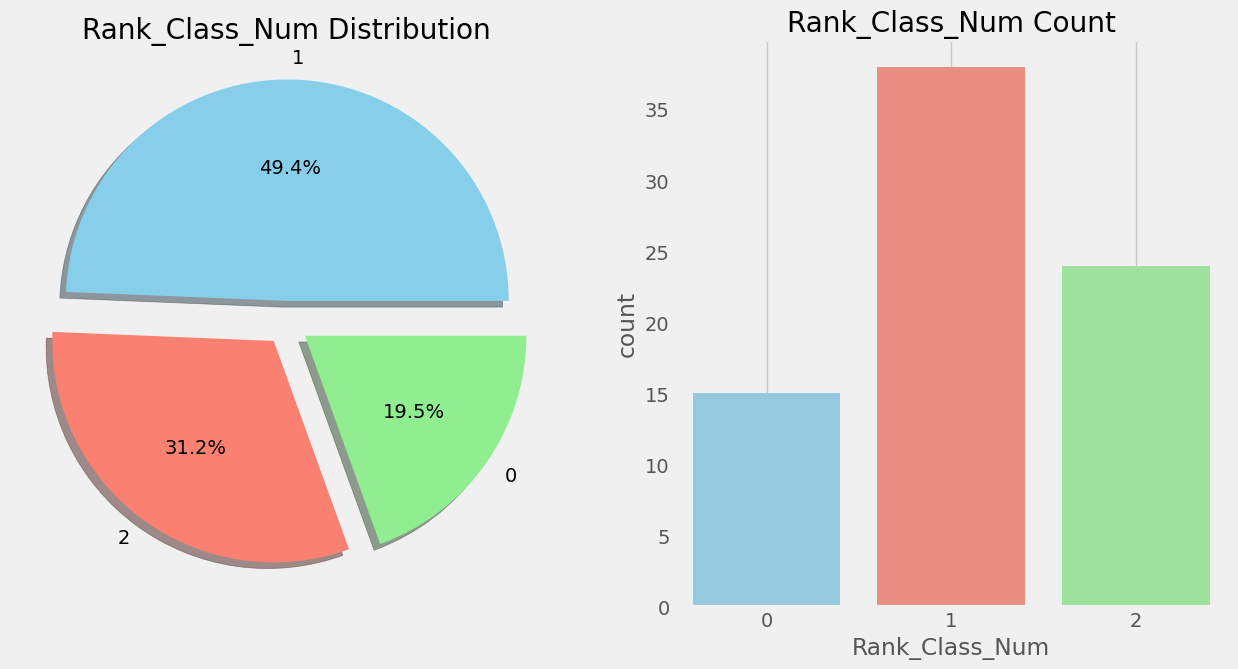

In [23]:
# Count the values in the 'Rank_Class_Num' column
rank_class_counts = df_merged['Rank_Class_Num'].value_counts()

# Outcome count plot
f, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart
colors = ['skyblue', 'salmon', 'lightgreen']  # Define colors for each class
rank_class_counts.plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=colors)
ax[0].set_title('Rank_Class_Num Distribution')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Rank_Class_Num', data=df_merged, ax=ax[1], palette=colors)
ax[1].set_title('Rank_Class_Num Count')

# Print the counts of each class
for index, value in rank_class_counts.items():
    print(f'{index}: {value}')

plt.grid()
plt.savefig('count.png')  # Save as .png file
plt.show()

- Out of total 77, 15 (Low Rank:0) are Well-nourished countries, 24 (Medium Rank:1) are Moderately nourished countries and 38 (High Rank:2) are Severely nourished countries.

- The countplot tells us that the dataset is imbalanced, the number of countires that are severely nourished countries are more than Moderately nourished countries and while the number of countires that are Moderately nourished countries are more than Well-nourished countries

### 6.2) Box Plot

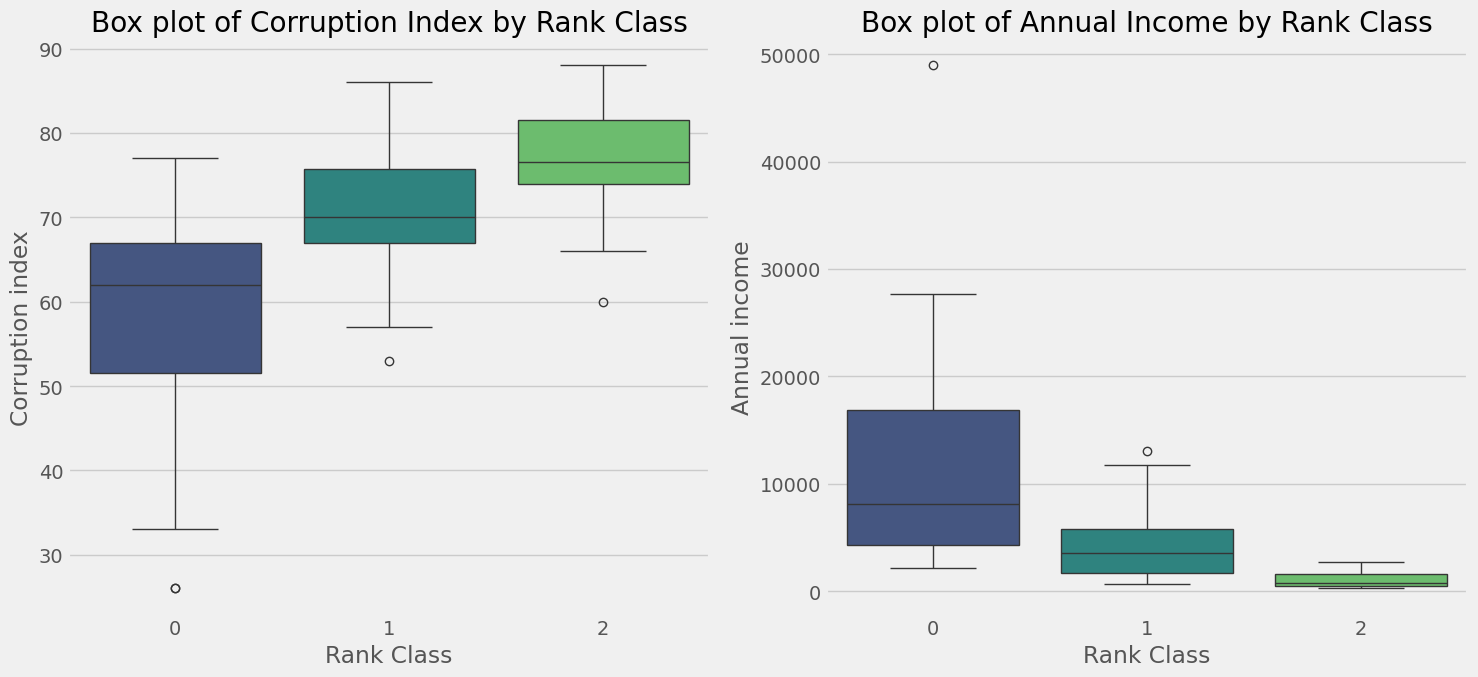

In [24]:
# Assuming you have a dataframe 'df_merged' with the specified columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Box plot for Corruption index
sns.boxplot(x='Rank_Class_Num', y='Corruption index', data=df_merged, ax=ax[0], palette='viridis')
ax[0].set_title('Box plot of Corruption Index by Rank Class')
ax[0].set_xlabel('Rank Class')
ax[0].set_ylabel('Corruption index')

# Box plot for Annual income
sns.boxplot(x='Rank_Class_Num', y='Annual income', data=df_merged, ax=ax[1], palette='viridis')
ax[1].set_title('Box plot of Annual Income by Rank Class')
ax[1].set_xlabel('Rank Class')
ax[1].set_ylabel('Annual income')

plt.tight_layout()
plt.savefig('boxplot.png')  # Save as .png file
plt.show()


- Rank Class 0: "modearte Corruption, moderate Income"
- Rank Class 1: "High Corruption, Low Income"
- Rank Class 2: " very High Corruption, very low Income"

### 6.3) Histograms

Histograms are one of the most common graphs used to display numeric data.

distribution of the data - Whether the data is normally distributed or if it's skewed (to the left or right)

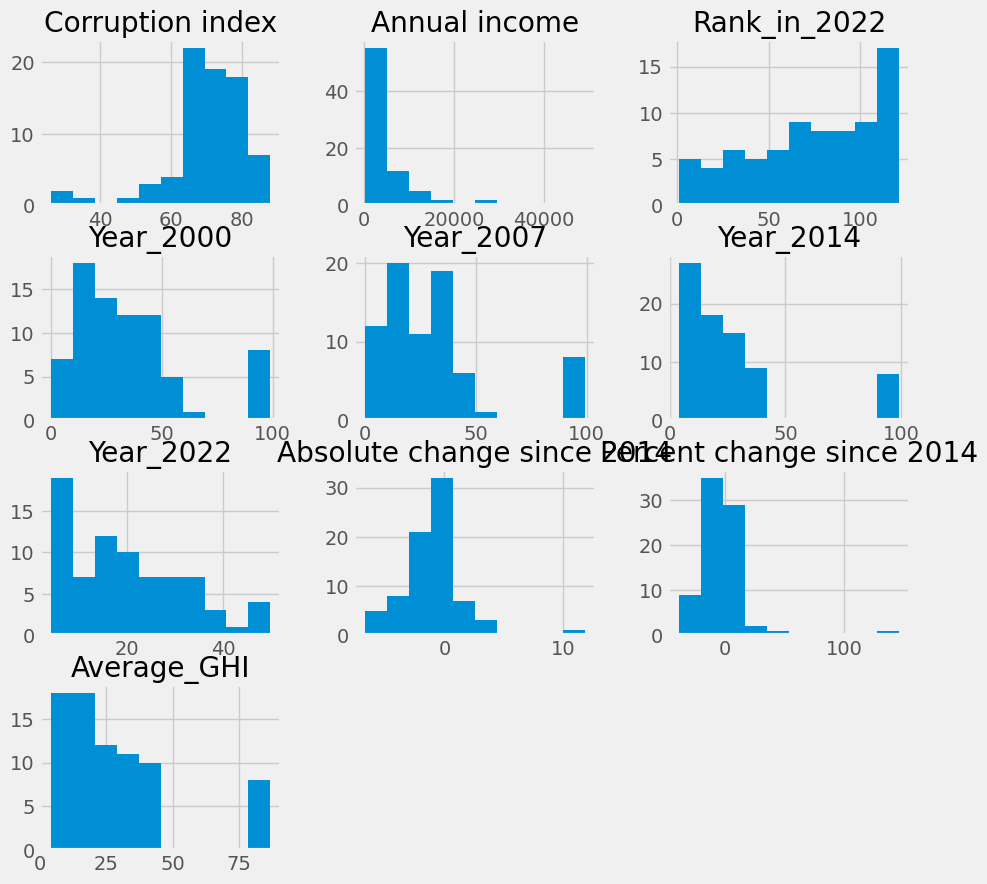

In [25]:
# Histogram of each feature 
df_merged.hist(bins=10,figsize=(10,10)) 
plt.savefig('histogram.png')  # Save as .png file
plt.show()

### 6.3) Scatter plot

Scatterplots are useful for many reasons: like correlation matrices, it allows us to quickly understand a relationship between two variables.

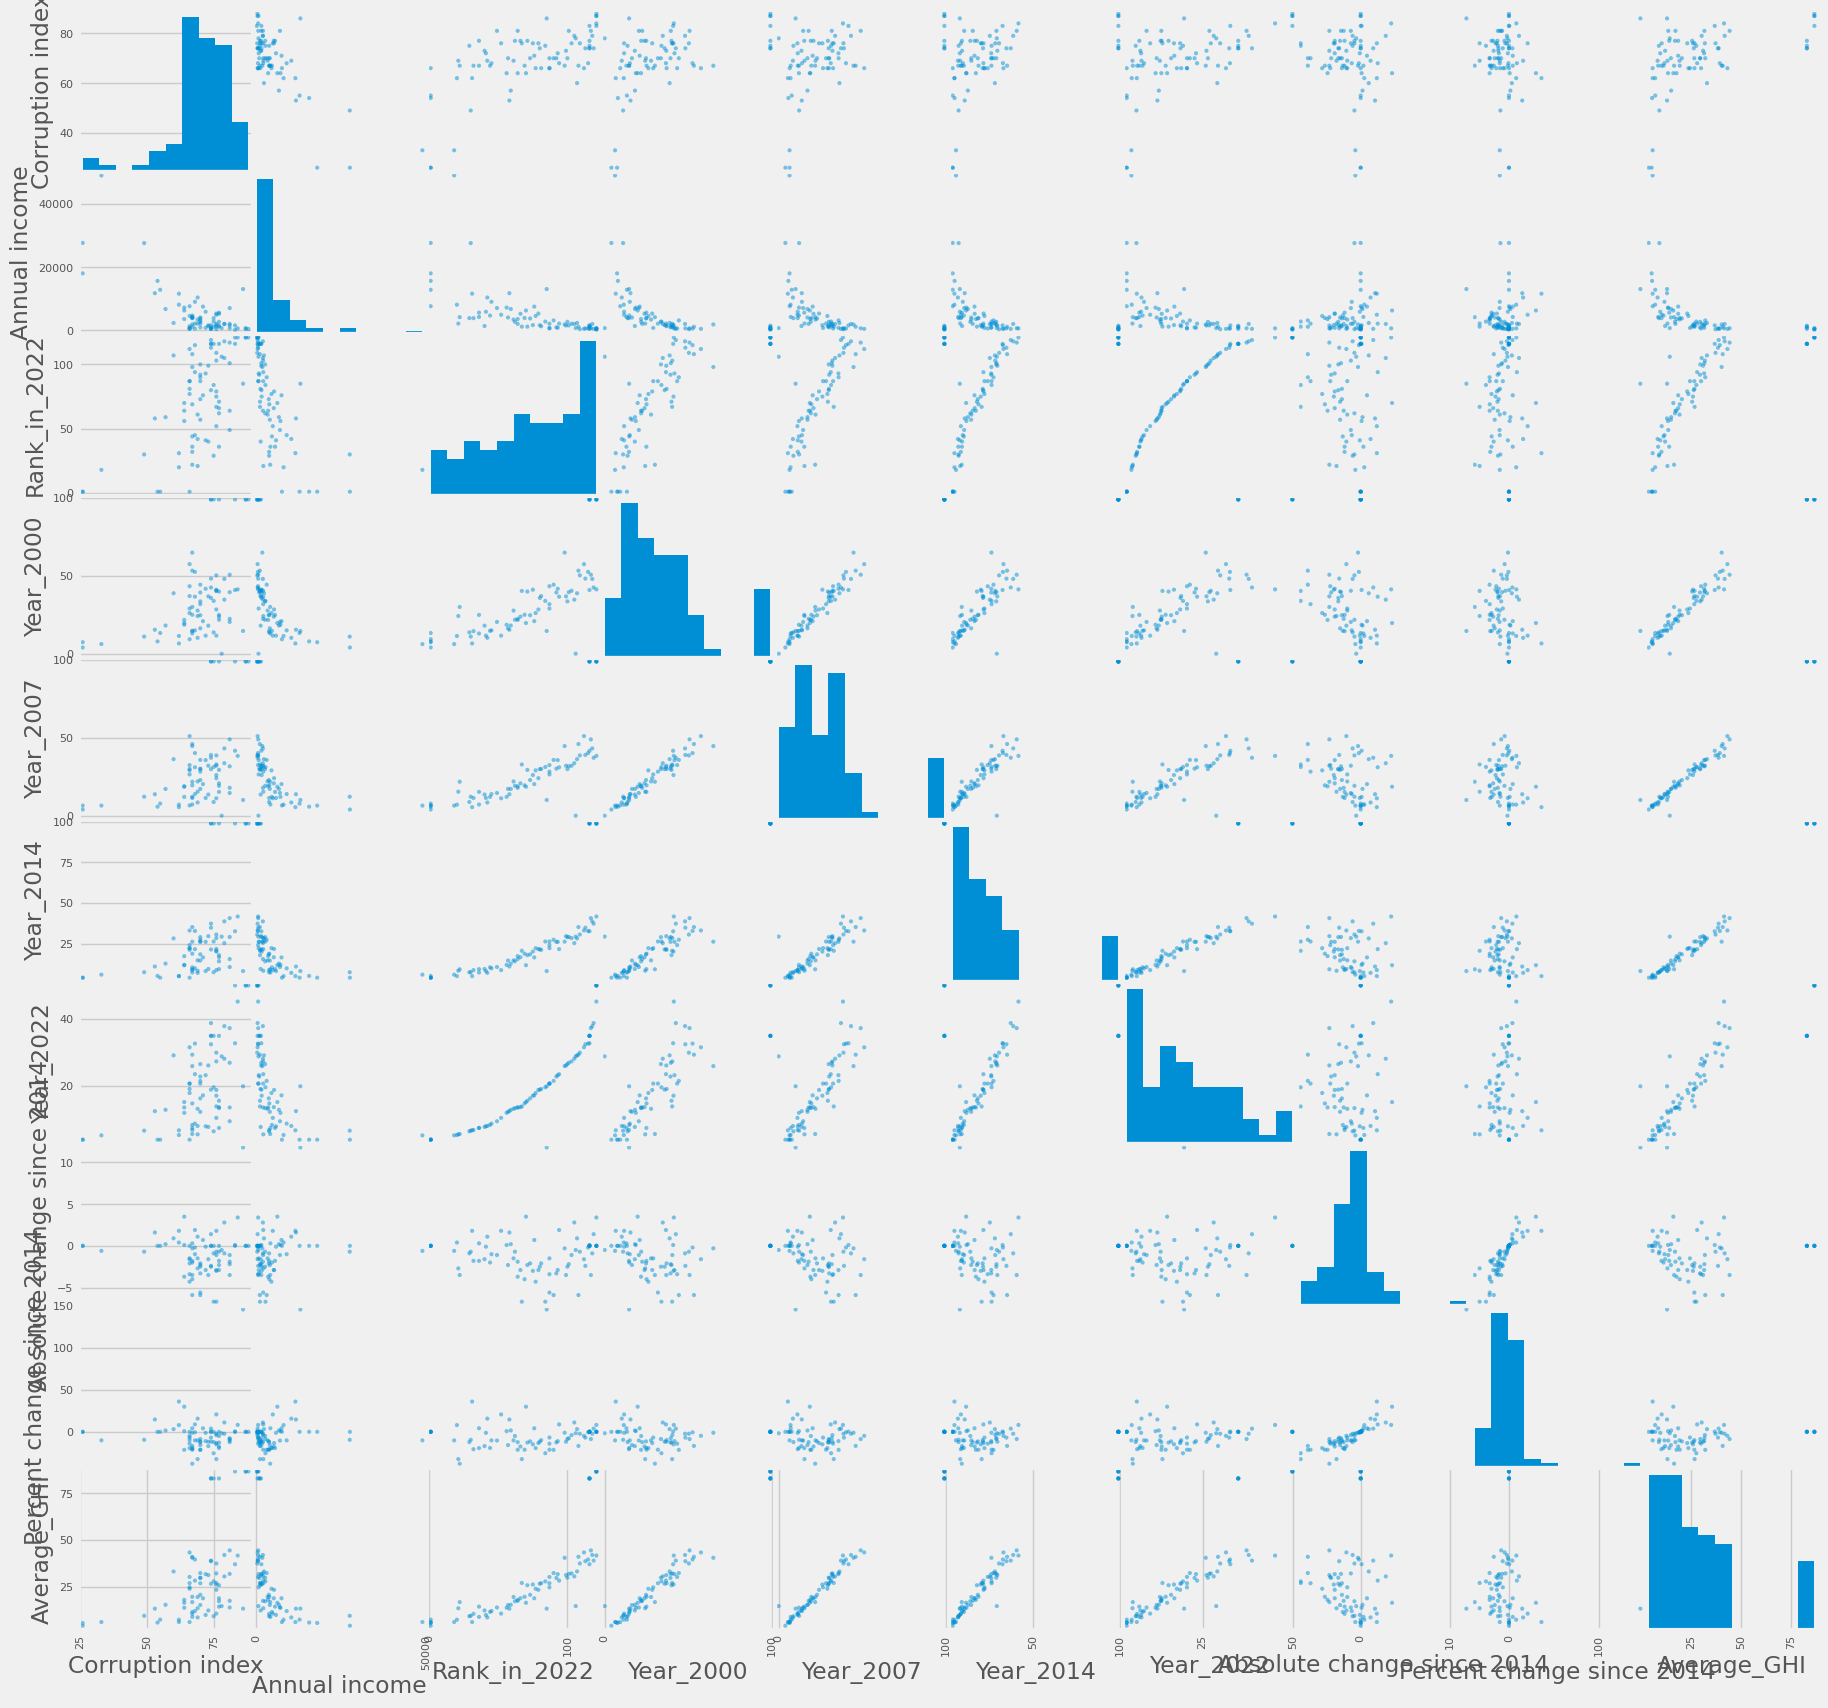

In [26]:
# Scatter plot matrix

from pandas.plotting import scatter_matrix 
scatter_matrix(df_merged, figsize = (20, 20));
plt.savefig('Scatter.png')  # Save as .png file

### 6.4) Pairplot

sns.pairplot() is a great way to create scatterplots between all of our variables.

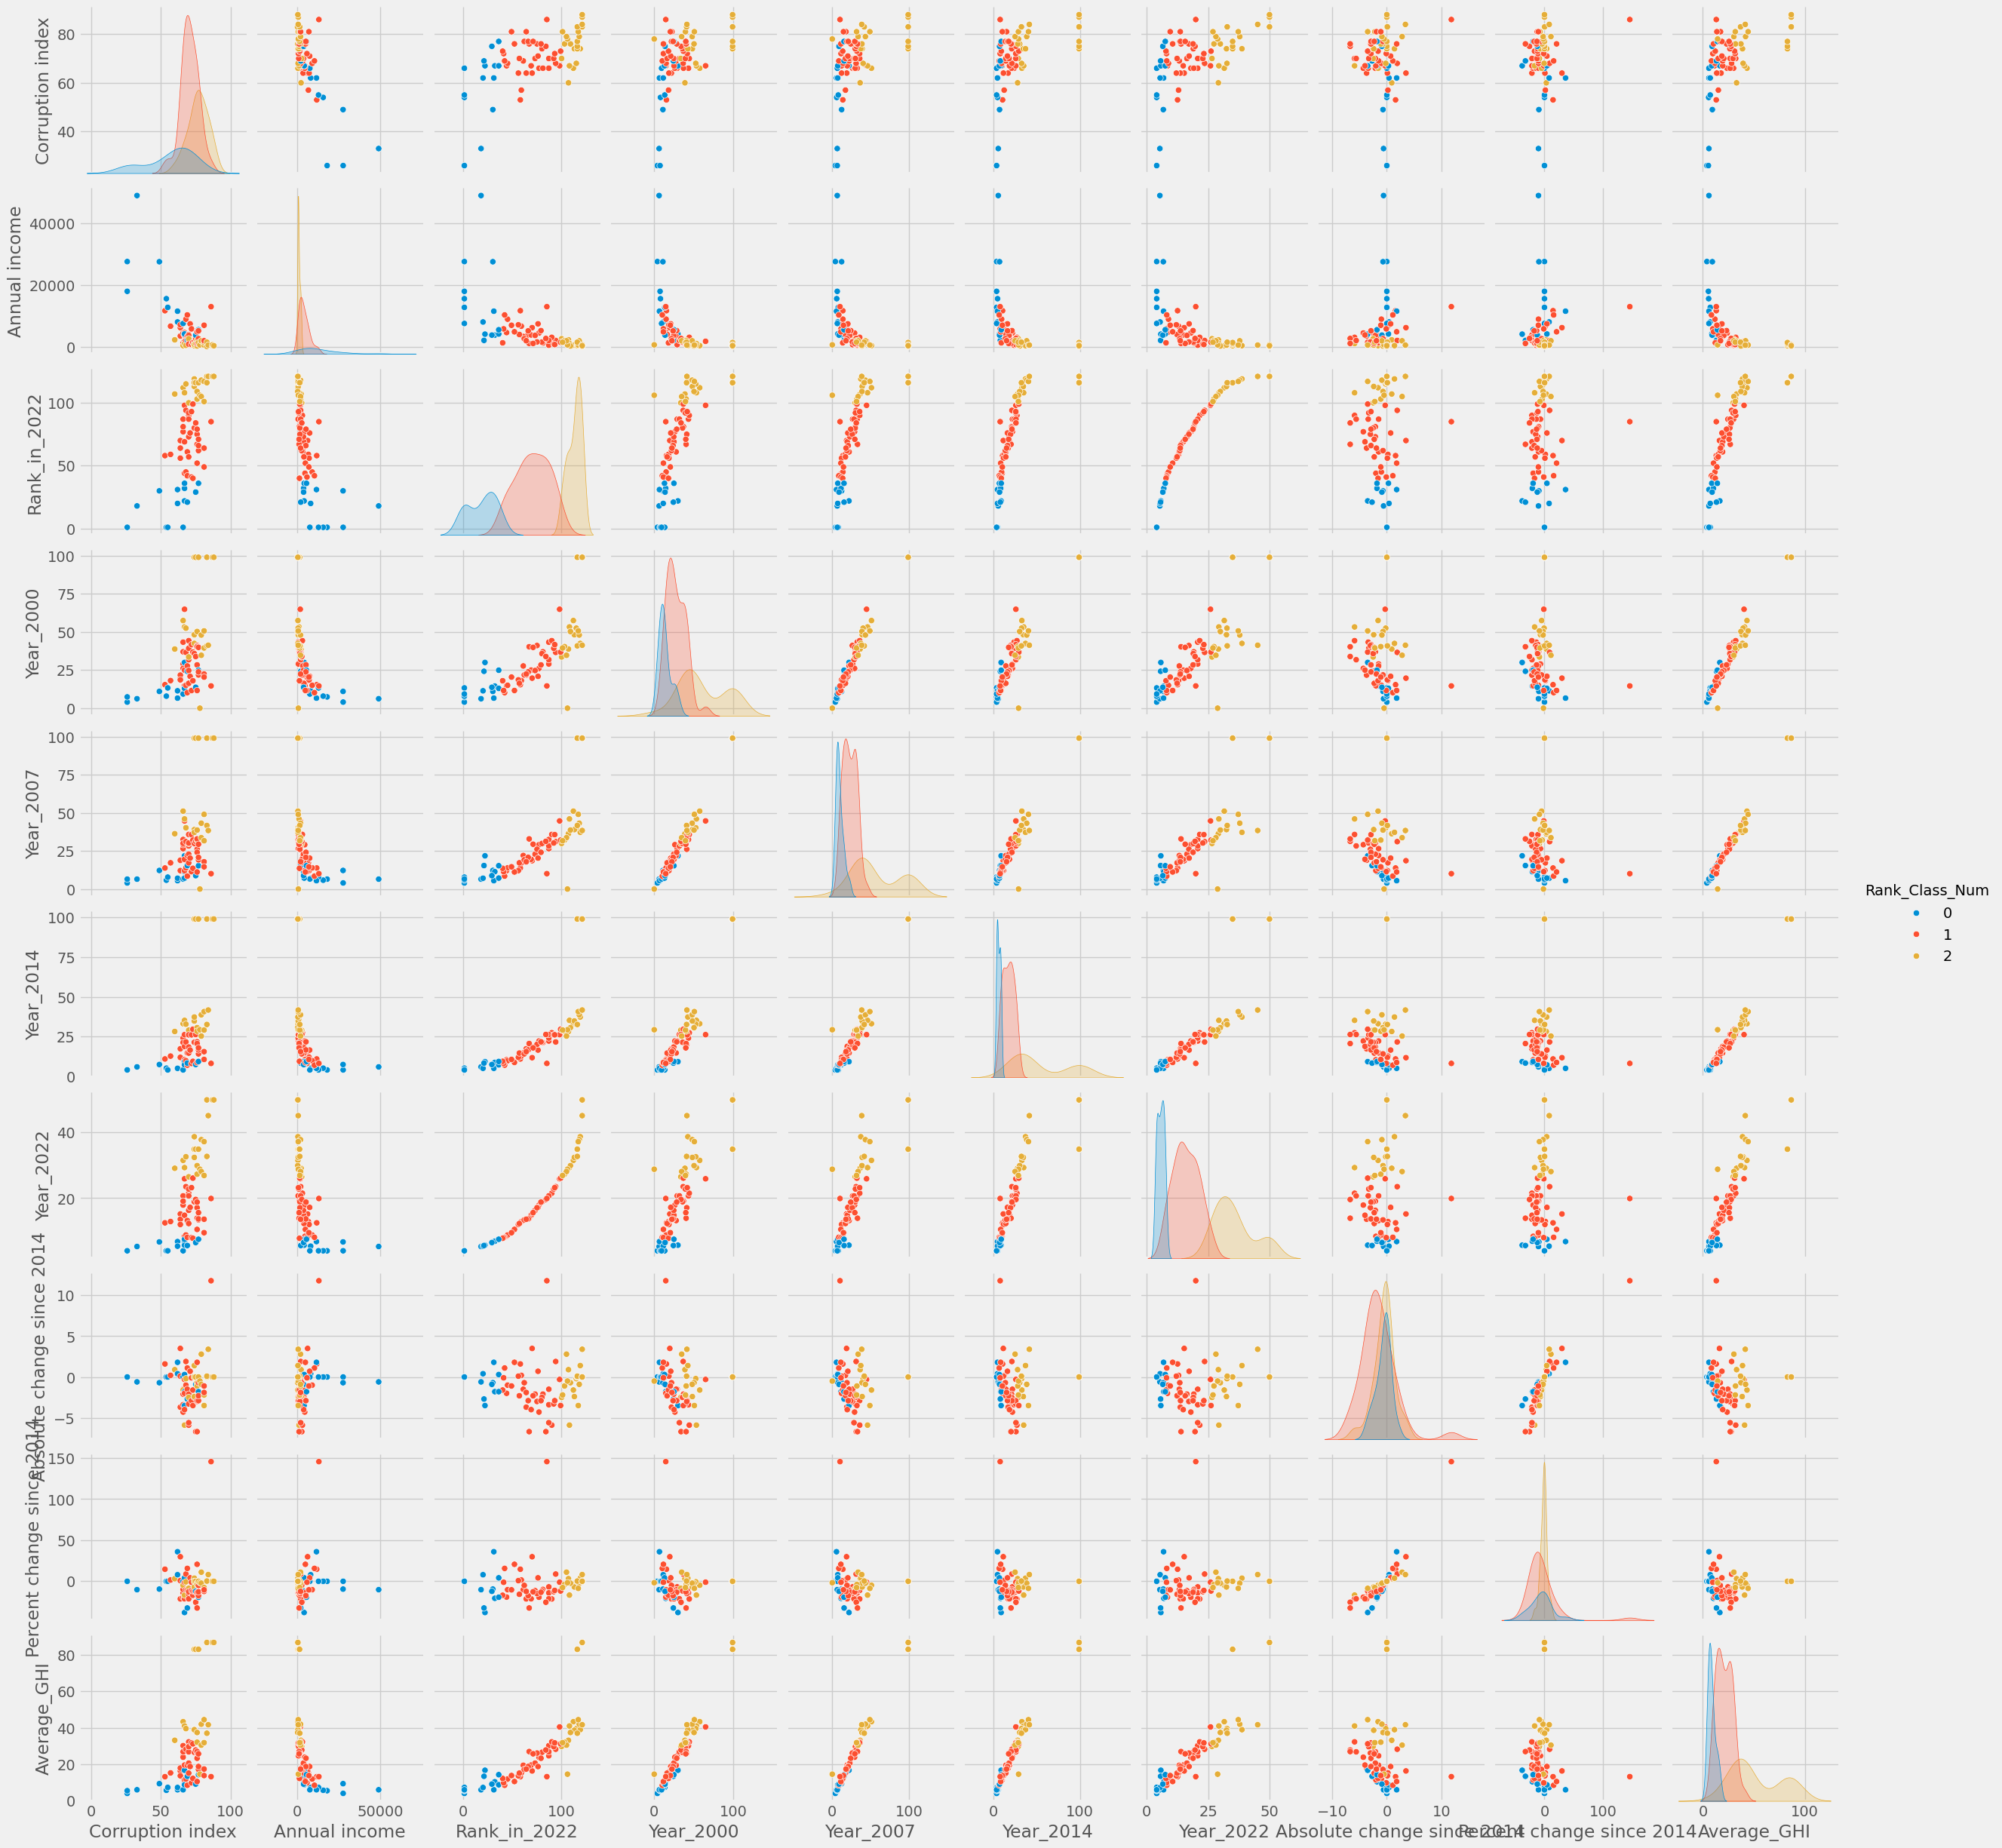

In [27]:
# Pairplot

sns.pairplot(data = df_merged, hue = 'Rank_Class_Num') 
plt.savefig('Pairplot.png')  # Save as .png file
plt.show()

### 6.5) Analyzing relationships between variables

####  Correlation analysis
Correlation analysis in data science is a statistical technique used to measure the strength and direction of the relationship between two or more variables in a dataset. It helps data scientists understand how changes in one variable are associated with changes in another. By calculating correlation coefficients, such as Pearson's correlation coefficient for continuous variables or rank-based correlations for non-linear or ordinal data, data scientists can identify patterns and dependencies in the data. This analysis is valuable for feature selection, identifying potential predictor variables, and gaining insights into the interactions between different aspects of the dataset, facilitating better decision-making and predictive modeling.

In [28]:
df_merged.drop(columns=['Country', 'Rank_Class'], inplace=True)

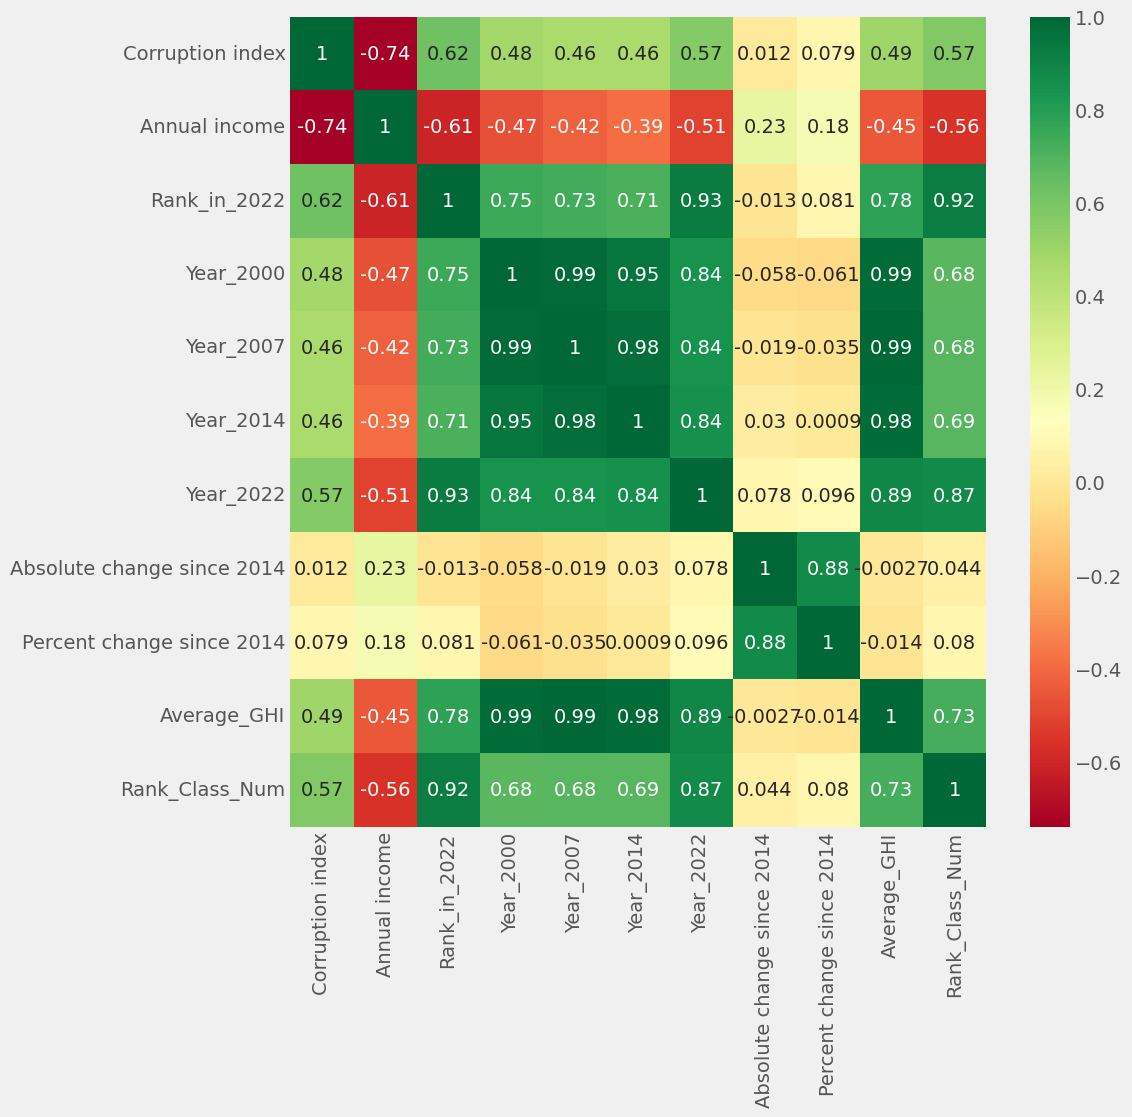

In [29]:
#get correlations of each features in dataset 
corrmat = df_merged.corr() 
top_corr_features = corrmat.index 
plt.figure(figsize=(10,10)) 
#plot heat map 
g=sns.heatmap(df_merged[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('correlations.png')  # Save as .png file

#### Observations:
-
From the correaltion heatmap, we can see that there is a high correlation betweeRanl_Class_Numme andAnnual income, Year_2000, Year_2007, Year_2014, Year_2022, Average_GHI, Rank_Class)
- . We can select these features to accept input from the user and predi t Rank_Class_Numme.

### 6.5.1 Correlation between Corruption Index and Annual income

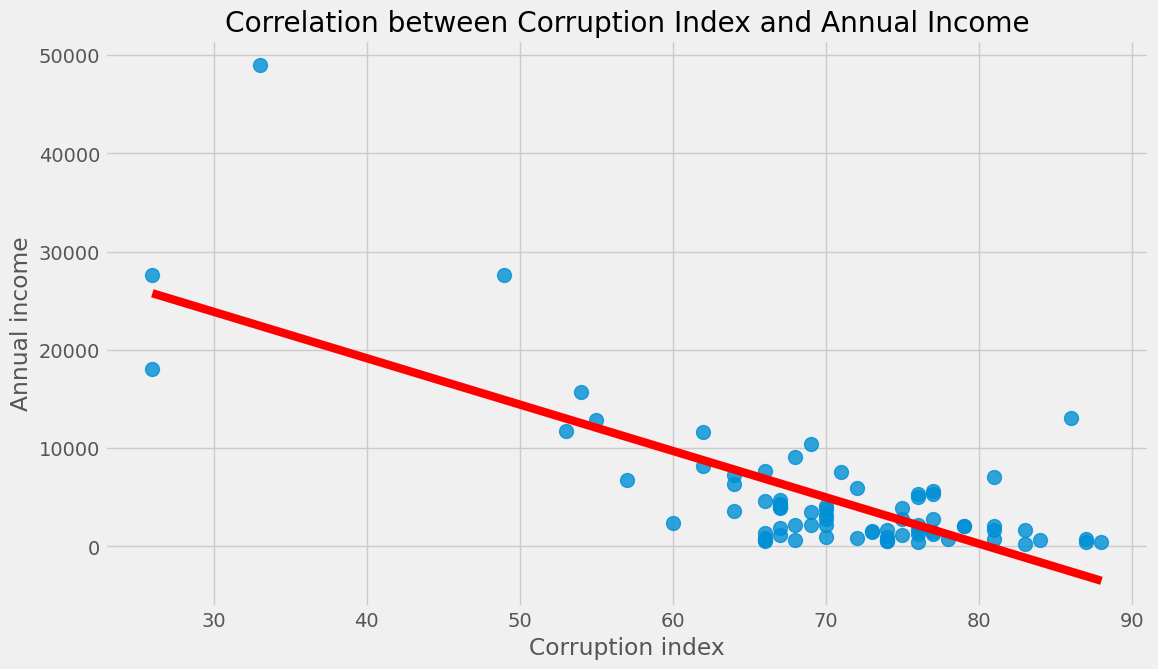

In [33]:
# Scatter plot
plt.figure(figsize=(12, 7))
sns.regplot(x='Corruption index', y='Annual income', data=df_merged, scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)
plt.title('Correlation between Corruption Index and Annual Income')
plt.xlabel('Corruption index')
plt.ylabel('Annual income')
plt.grid(True)
plt.savefig('Corruption IndexandAnnual income.png')  # Save as .png file
plt.show()

- This value indicates a strong negative linear relationship between the two variables. 
- The corruption index of a country increases (indicating higher corruption), its average annual income tends to decrease, and vice versa.

### 6.5.2 Correlation between Rank_Class_Num and Annual income

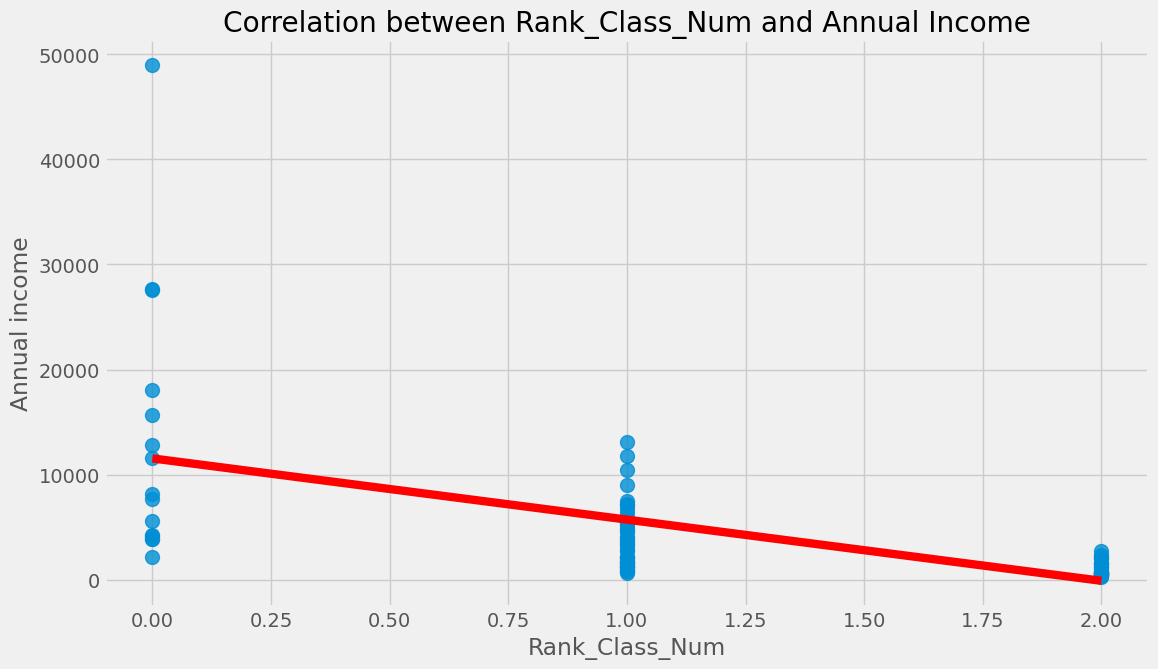

In [32]:
# Scatter plot
plt.figure(figsize=(12, 7))
sns.regplot(x='Rank_Class_Num', y='Annual income', data=df_merged, scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)
plt.title('Correlation between Rank_Class_Num and Annual Income')
plt.xlabel('Rank_Class_Num')
plt.ylabel('Annual income')
plt.grid(True)
plt.savefig('Rank_Class_Num Annual income.png')  # Save as .png file
plt.show()

- This value indicates a strong negative linear relationship between the two variables. 
- The Rank_Class_Num of (Low Rank:0) indicating lower corruption, its average annual income tends to increase, and vice versa.
- The the countries with low ranking in corruption tends to have higher anunal incme, and vice versa

### 6.5.3 Correlation between Corruption index and Average GHI

Corruption_Level
Low        4.737500
Medium    12.821429
High      30.586397
Name: Average_GHI, dtype: float64


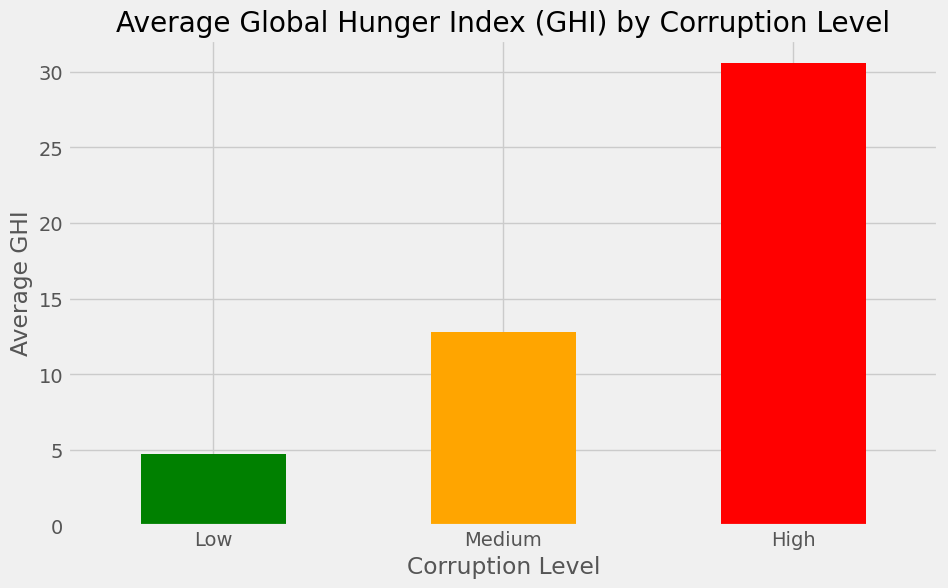

In [34]:
# Create corruption level groups (you can define your own thresholds)
df_merged['Corruption_Level'] = pd.cut(df_merged['Corruption index'], bins=[0, 30, 60, 100], labels=['Low', 'Medium', 'High'])

# Calculate average GHI for each corruption level
avg_ghi_by_corruption = df_merged.groupby('Corruption_Level')['Average_GHI'].mean()
print(avg_ghi_by_corruption)

# Plotting the average GHI for each corruption level
plt.figure(figsize=(10, 6))
avg_ghi_by_corruption.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Average Global Hunger Index (GHI) by Corruption Level')
plt.xlabel('Corruption Level')
plt.ylabel('Average GHI')
plt.xticks(rotation=0)
plt.savefig('GHI vs Corruption Level.png')  # Save as .png file
plt.show()

### Observations:

- Frome the bar chart above we can see that countries with higher corruption tend to have worse hunger indices

# Step 7 **Machine Learning**

The following machine Learning algorithms are chosen to fit to the dataset. These models should be classifiers for multi-class classification. 

1. Logistic Regression (LR)
2. Decision Tree (DT)
3. Random Forest (RF)
4. Support Vector Machine(SVM)
5. KNeighborsClassifier(KNN)</h3>

# 7.1) Split the data frame into X & y

In [35]:
# Define feature and target variables
X = ['Corruption index', 'Annual income', 'Rank_in_2022', 'Year_2000', 'Year_2007', 'Year_2014', 'Year_2022', 'Average_GHI']
y = ['Rank_Class_Num']

# Assuming df_merged is your DataFrame
merged_dataset = df_merged

# Separate object for target feature
target_name = y[0]
y = merged_dataset[target_name]

# Separate object for input features
X = merged_dataset[X]

In [36]:
X.head()

Corruption index  Annual income  Rank_in_2022  Year_2000  Year_2007  \
0                26        27640.0             1        4.0        4.0   
1                26        18030.0             1        7.4        6.5   
2                33        48950.0            18        6.2        6.5   
3                49        27590.0            30       11.0       12.2   
4                53        11780.0            58       15.4       13.8   

   Year_2014  Year_2022  Average_GHI  
0        4.0        4.0        4.000  
1        4.0        4.0        5.475  
2        5.9        5.3        5.975  
3        7.4        6.7        9.325  
4       10.9       12.5       13.150

In [37]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Rank_Class_Num, dtype: category
Categories (3, int64): [0 < 1 < 2]

# Step 8) Apply Feature Scalling

In [38]:
scaler = StandardScaler()
scaler.fit(X)
SSX = scaler.transform(X)

Inplace of Standard Scaler you have to try other data scaling technique like normalizer, minmax scaler and binarizer

# Step 9) Train Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [40]:
X_train.shape, y_train.shape

((61, 8), (61,))

In [41]:
X_test.shape, y_test.shape

((16, 8), (16,))

## Step 10) Build the Classification Algorithms

### 10.1) Dscission Tree

In [42]:
# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

### 10.2) Randon Forest

In [43]:
# using RF classifier
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

### 10.3) Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(solver='liblinear', multi_class='ovr')
classifierLR.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

### 10.4) KNeighbors Classifier(KNN)

In [45]:
classifierKNN = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors as needed
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### 10.5) Support Vector Machine

In [46]:
from sklearn.svm import SVC
classifierSVM = SVC()
classifierSVM.fit(X_train, y_train)

classifierSVM = SVC(kernel='linear', C=1.0)  # You can change the kernel and other hyperparameters as needed
classifierSVM.fit(X_train, y_train)

SVC(kernel='linear')

# Step 11) Making Prediction of Classification Algorithms

In [47]:
# use the chosen four models to make predictions on test data
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)
y_predLR = classifierLR.predict(X_test)
y_predKNN = classifierKNN.predict(X_test)
y_predSVM = classifierSVM.predict(X_test)

# Step 12) Model Evaluation each Classification Algorithms

### 12.1) Dscission Tree

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# for DT model
print("Decision Trees:")
DT_accuracy = accuracy_score(y_test, y_predDT)
DT_precision = precision_score(y_test, y_predDT, average='macro')
DT_recall = recall_score(y_test, y_predDT, average='macro')     
DT_f1 = f1_score(y_test, y_predDT, average='macro')     

print("\nAccuracy:", DT_accuracy)
print("\nPrecision:", DT_precision)
print("\nRecall:", DT_recall)
print("\nF1-score:", DT_f1)

# using confusion matrix
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy score of Decision Tree: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy score of Decision Tree: ", accuracy_score(y_test, y_predDT))

Decision Trees:

Accuracy: 0.9375

Precision: 0.9761904761904763

Recall: 0.8333333333333334

F1-score: 0.8765432098765431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.93      1.00      0.96        13
           2       1.00      0.50      0.67         2

    accuracy                           0.94        16
   macro avg       0.98      0.83      0.88        16
weighted avg       0.94      0.94      0.93        16

Train Accuracy score of Decision Tree:  1.0
Test Accuracy score of Decision Tree:  0.9375


In [49]:
comparision = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

comparision.loc[0] = ['DT', DT_accuracy, DT_precision, DT_recall, DT_f1,]
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT    0.9375    0.97619  0.833333  0.876543

### 12.2) Randon Forest

In [50]:
# for RF model
print("Ramdon Forest:")
RF_accuracy = accuracy_score(y_test, y_predRF)
RF_precision = precision_score(y_test, y_predRF, average='macro')
RF_recall = recall_score(y_test, y_predRF, average='macro')
RF_f1 = f1_score(y_test, y_predRF, average='macro')

print("\nAccuracy:", RF_accuracy)
print("\nPrecision:", RF_precision)
print("\nRecall:", RF_recall)
print("\nF1-score:", RF_f1)

# using confusion matrix
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy score of Random Forest: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy score of Random Forest: ", accuracy_score(y_test, y_predRF))

Ramdon Forest:

Accuracy: 0.9375

Precision: 0.9761904761904763

Recall: 0.8333333333333334

F1-score: 0.8765432098765431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.93      1.00      0.96        13
           2       1.00      0.50      0.67         2

    accuracy                           0.94        16
   macro avg       0.98      0.83      0.88        16
weighted avg       0.94      0.94      0.93        16

Train Accuracy score of Random Forest:  1.0
Test Accuracy score of Random Forest:  0.9375


In [51]:
comparision.loc[1] = ['RF', RF_accuracy, RF_precision, RF_recall, RF_f1]
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT    0.9375    0.97619  0.833333  0.876543
1    RF    0.9375    0.97619  0.833333  0.876543

### 12.3) Logistic Regression

In [52]:
# for RF model
print("Logistic Regression:")
LR_accuracy = accuracy_score(y_test, y_predLR)
LR_precision = precision_score(y_test, y_predLR, average='macro')
LR_recall = recall_score(y_test, y_predLR, average='macro')
LR_f1 = f1_score(y_test, y_predLR, average='macro')

print("\nAccuracy:", LR_accuracy)
print("\nPrecision:", LR_precision)
print("\nRecall:", LR_recall)
print("\nF1-score:", LR_f1)

# using confusion matrix
print(classification_report(y_test, y_predLR))

# using accuracy performance metric
print("Train Accuracy score of logistic Regression: ", accuracy_score(y_train, classifierLR.predict(X_train)))
print("Test Accuracy score of logistic Regression: ", accuracy_score(y_test, y_predLR))

Logistic Regression:

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1-score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Train Accuracy score of logistic Regression:  0.9344262295081968
Test Accuracy score of logistic Regression:  1.0


In [53]:
comparision.loc[2] = ['LR', LR_accuracy, LR_precision, LR_recall, LR_f1]
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT    0.9375    0.97619  0.833333  0.876543
1    RF    0.9375    0.97619  0.833333  0.876543
2    LR    1.0000    1.00000  1.000000  1.000000

### 12.4) KNeighbors Classifier(KNN)

In [54]:
# for RF model
print("KNeighbors:")
KNN_accuracy = accuracy_score(y_test, y_predKNN)
KNN_precision = precision_score(y_test, y_predKNN, average='macro')
KNN_recall = recall_score(y_test, y_predKNN, average='macro')
KNN_f1 = f1_score(y_test, y_predKNN, average='macro')

print("\nAccuracy:", KNN_accuracy)
print("\nPrecision:", KNN_precision)
print("\nRecall:", KNN_recall)
print("\nF1-score:", KNN_f1)

# using confusion matrix
print(classification_report(y_test, y_predKNN))

# using accuracy performance metric
print("Train Accuracy score of KNeighbors: ", accuracy_score(y_train, classifierKNN.predict(X_train)))
print("Test Accuracy score of KNeighbors: ", accuracy_score(y_test, y_predKNN))

KNeighbors:

Accuracy: 0.9375

Precision: 0.9761904761904763

Recall: 0.8333333333333334

F1-score: 0.8765432098765431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.93      1.00      0.96        13
           2       1.00      0.50      0.67         2

    accuracy                           0.94        16
   macro avg       0.98      0.83      0.88        16
weighted avg       0.94      0.94      0.93        16

Train Accuracy score of KNeighbors:  0.9508196721311475
Test Accuracy score of KNeighbors:  0.9375


In [55]:
comparision.loc[3] = ['KNN', KNN_accuracy, KNN_precision, KNN_recall, KNN_f1]
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT    0.9375    0.97619  0.833333  0.876543
1    RF    0.9375    0.97619  0.833333  0.876543
2    LR    1.0000    1.00000  1.000000  1.000000
3   KNN    0.9375    0.97619  0.833333  0.876543

### 12.5) Suppoer Vector Manchine 

In [56]:
# for RF model
print("Suppoer Vector Manchine:")
SVM_accuracy = accuracy_score(y_test, y_predSVM)
SVM_precision = precision_score(y_test, y_predSVM, average='macro')
SVM_recall = recall_score(y_test, y_predSVM, average='macro')
SVM_f1 = f1_score(y_test, y_predSVM, average='macro')

print("\nAccuracy:", SVM_accuracy)
print("\nPrecision:", SVM_precision)
print("\nRecall:", SVM_recall)
print("\nF1-score:", SVM_f1)

# using confusion matrix
print(classification_report(y_test, y_predSVM))

# using accuracy performance metric
print("Train Accuracy score of Suppoer Vector Manchine: ", accuracy_score(y_train, classifierSVM.predict(X_train)))
print("Test Accuracy score of Suppoer Vector Manchine: ", accuracy_score(y_test, y_predSVM))

Suppoer Vector Manchine:

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1-score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Train Accuracy score of Suppoer Vector Manchine:  0.9508196721311475
Test Accuracy score of Suppoer Vector Manchine:  1.0


In [57]:
comparision.loc[4] = ['SVM', SVM_accuracy, SVM_precision, SVM_recall, SVM_f1]
comparision

Model  Accuracy  Precision    Recall  F1-score
0    DT    0.9375    0.97619  0.833333  0.876543
1    RF    0.9375    0.97619  0.833333  0.876543
2    LR    1.0000    1.00000  1.000000  1.000000
3   KNN    0.9375    0.97619  0.833333  0.876543
4   SVM    1.0000    1.00000  1.000000  1.000000

# 12.6) Confusion Matrix

Confusion metrices is a Table which is used to describe the performance of classificaion problem

It visualizes the accuracy of a classifier by comparing predicted values with actual values.

The terms used in confusion matrices are True Positive(TP), True Negetive(TN), False Positive(FP) and False Negetive(FN)

### 12.6.1) Confusion Matrix of Decision Tree

[[ 1  0  0]
 [ 0 13  0]
 [ 0  1  1]]


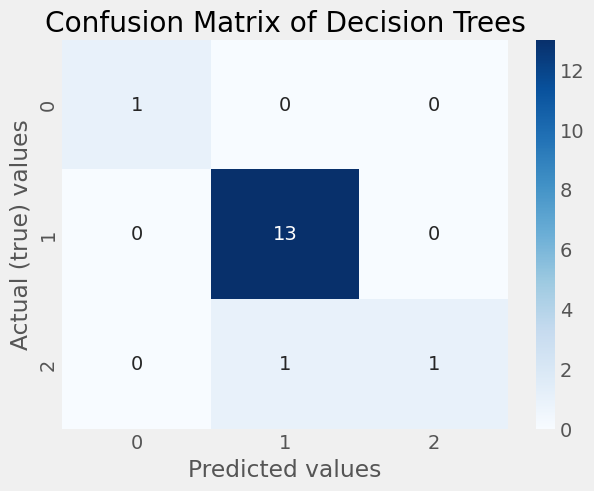

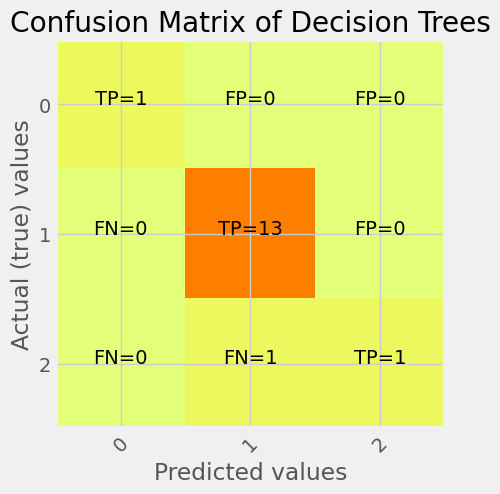

In [58]:
# Compute the confusion matrix
DT_CM = confusion_matrix(y_test, y_predDT)
print(DT_CM)

# Plot confusion matrix using seaborn
sns.heatmap(DT_CM, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix of Decision Trees')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
plt.show()

# Plot confusion matrix using matplotlib
plt.clf()
plt.imshow(DT_CM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1', '2']
plt.title('Confusion Matrix of Decision Trees')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Annotate the confusion matrix with text
# Dictionary to map cell positions to TP, FP, FN, TN labels
labels = {0: 'TP', 1: 'FP', 2: 'FN', 3: 'TN'}

for i in range(len(classNames)):
    for j in range(len(classNames)):
        # Determine the type of cell (TP, FP, FN, TN)
        if i == j:
            label = 'TP'
        else:
            if i < j:
                label = 'FP'
            else:
                label = 'FN'
        plt.text(j, i, f"{label}={DT_CM[i, j]}", horizontalalignment='center', color='black')

plt.show()

In [59]:
pd.crosstab(y_test, y_predDT, margins=False)

col_0           0   1  2
Rank_Class_Num          
0               1   0  0
1               0  13  0
2               0   1  1

In [60]:
pd.crosstab(y_test, y_predDT, margins=True)

col_0           0   1  2  All
Rank_Class_Num               
0               1   0  0    1
1               0  13  0   13
2               0   1  1    2
All             1  14  1   16

In [61]:
pd.crosstab(y_test, y_predDT, rownames=['Actual values'], colnames=['Predicted values'], margins=True)

Predicted values  0   1  2  All
Actual values                  
0                 1   0  0    1
1                 0  13  0   13
2                 0   1  1    2
All               1  14  1   16

### 12.6.2) Confusion Matrix of Random Forest

[[ 1  0  0]
 [ 0 13  0]
 [ 0  0  2]]


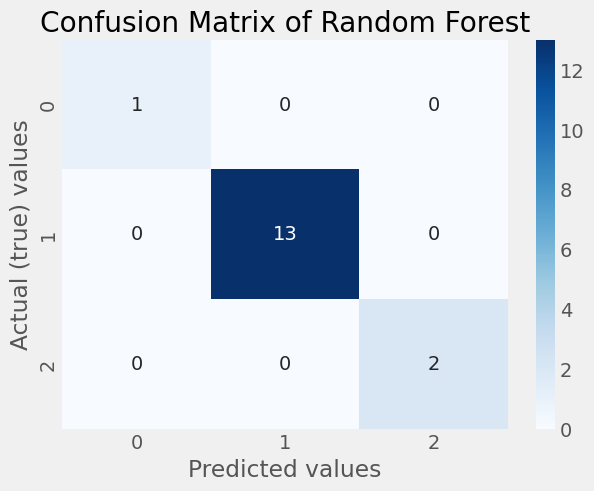

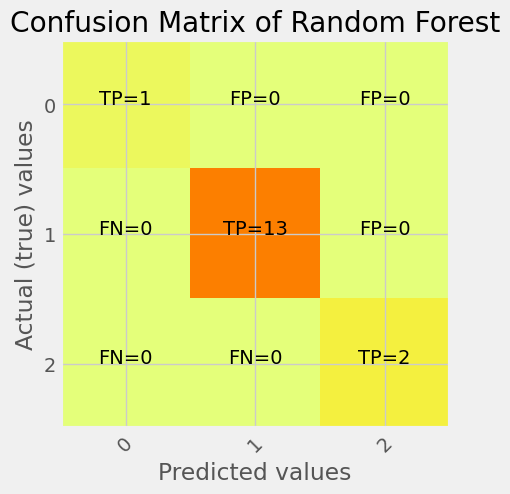

In [62]:
# Compute the confusion matrix
RF_CM = confusion_matrix(y_test, y_predLR)
print(RF_CM)

# Plot confusion matrix using seaborn
sns.heatmap(RF_CM, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
plt.show()

# Plot confusion matrix using matplotlib
plt.clf()
plt.imshow(RF_CM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1', '2']
plt.title('Confusion Matrix of Random Forest')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Annotate the confusion matrix with text
# Dictionary to map cell positions to TP, FP, FN, TN labels
labels = {0: 'TP', 1: 'FP', 2: 'FN', 3: 'TN'}

for i in range(len(classNames)):
    for j in range(len(classNames)):
        # Determine the type of cell (TP, FP, FN, TN)
        if i == j:
            label = 'TP'
        else:
            if i < j:
                label = 'FP'
            else:
                label = 'FN'
        plt.text(j, i, f"{label}={RF_CM[i, j]}", horizontalalignment='center', color='black')

plt.show()

### 12.6.4) Confusion Matrix of Logistic Regression

[[ 1  0  0]
 [ 0 13  0]
 [ 0  0  2]]


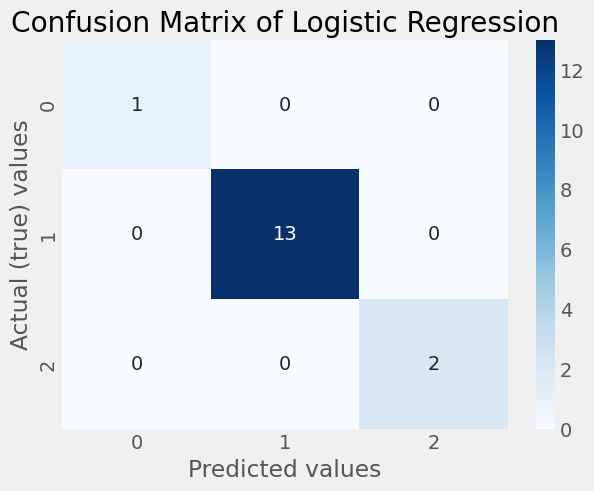

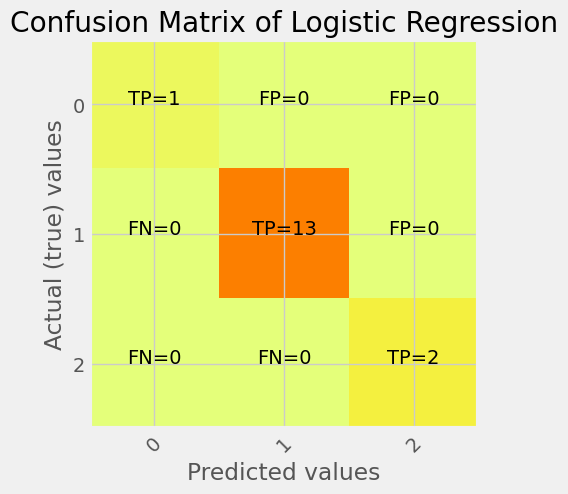

In [63]:
# Compute the confusion matrix
LR_CM = confusion_matrix(y_test, y_predLR)
print(LR_CM)

# Plot confusion matrix using seaborn
sns.heatmap(LR_CM, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
plt.show()

# Plot confusion matrix using matplotlib
plt.clf()
plt.imshow(LR_CM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1', '2']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Annotate the confusion matrix with text
# Dictionary to map cell positions to TP, FP, FN, TN labels
labels = {0: 'TP', 1: 'FP', 2: 'FN', 3: 'TN'}

for i in range(len(classNames)):
    for j in range(len(classNames)):
        # Determine the type of cell (TP, FP, FN, TN)
        if i == j:
            label = 'TP'
        else:
            if i < j:
                label = 'FP'
            else:
                label = 'FN'
        plt.text(j, i, f"{label}={LR_CM[i, j]}", horizontalalignment='center', color='black')

plt.show()

### 12.6.5) Confusion Matrix of KNN

[[ 1  0  0]
 [ 0 13  0]
 [ 0  1  1]]


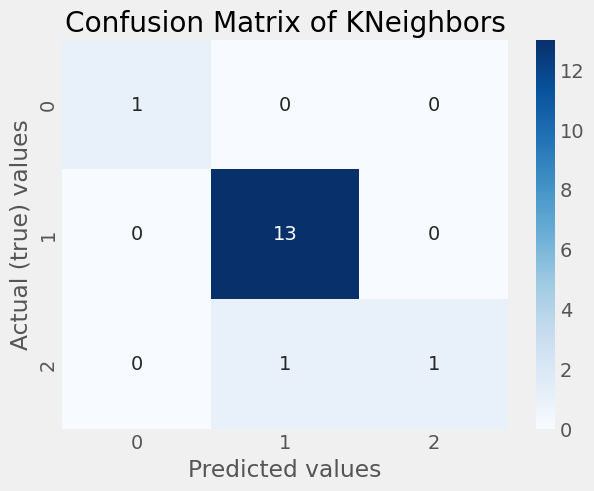

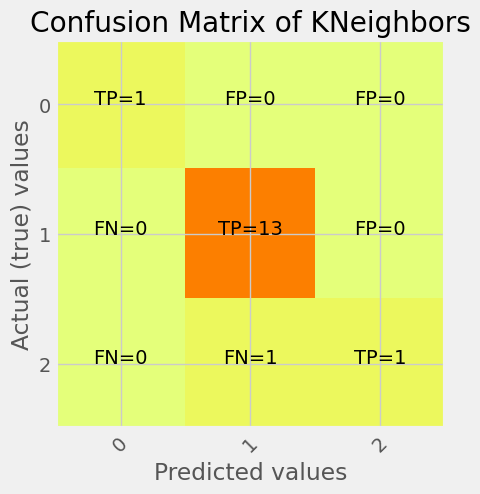

In [64]:
# Compute the confusion matrix
KNN_CM = confusion_matrix(y_test, y_predKNN)
print(KNN_CM)

# Plot confusion matrix using seaborn
sns.heatmap(KNN_CM, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix of KNeighbors')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
plt.show()

# Plot confusion matrix using matplotlib
plt.clf()
plt.imshow(KNN_CM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1', '2']
plt.title('Confusion Matrix of KNeighbors')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Annotate the confusion matrix with text
# Dictionary to map cell positions to TP, FP, FN, TN labels
labels = {0: 'TP', 1: 'FP', 2: 'FN', 3: 'TN'}

for i in range(len(classNames)):
    for j in range(len(classNames)):
        # Determine the type of cell (TP, FP, FN, TN)
        if i == j:
            label = 'TP'
        else:
            if i < j:
                label = 'FP'
            else:
                label = 'FN'
        plt.text(j, i, f"{label}={KNN_CM[i, j]}", horizontalalignment='center', color='black')

plt.show()

### 12.6.6) Confusion Matrix of Suppoer Vector Machine

[[ 1  0  0]
 [ 0 13  0]
 [ 0  1  1]]


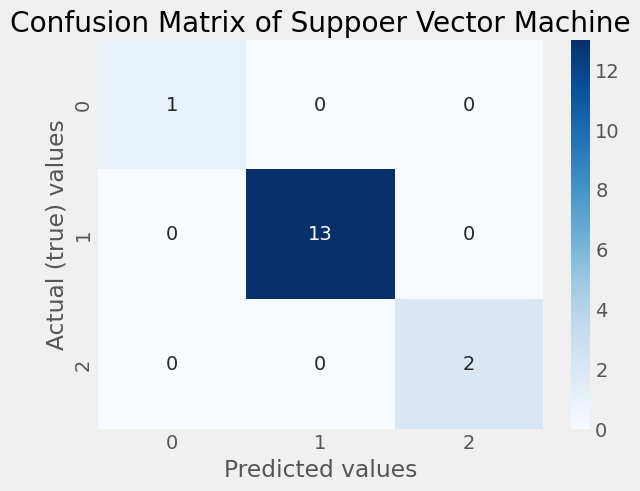

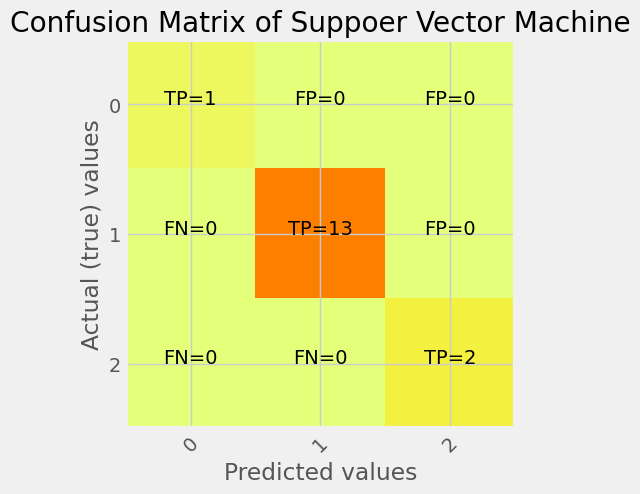

In [65]:
# Compute the confusion matrix
SVM_CM = confusion_matrix(y_test, y_predSVM)
print(KNN_CM)

# Plot confusion matrix using seaborn
sns.heatmap(SVM_CM, annot=True, fmt="d", cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title('Confusion Matrix of Suppoer Vector Machine')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
plt.show()

# Plot confusion matrix using matplotlib
plt.clf()
plt.imshow(SVM_CM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1', '2']
plt.title('Confusion Matrix of Suppoer Vector Machine')
plt.ylabel('Actual (true) values')
plt.xlabel('Predicted values')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Annotate the confusion matrix with text
# Dictionary to map cell positions to TP, FP, FN, TN labels
labels = {0: 'TP', 1: 'FP', 2: 'FN', 3: 'TN'}

for i in range(len(classNames)):
    for j in range(len(classNames)):
        # Determine the type of cell (TP, FP, FN, TN)
        if i == j:
            label = 'TP'
        else:
            if i < j:
                label = 'FP'
            else:
                label = 'FN'
        plt.text(j, i, f"{label}={SVM_CM[i, j]}", horizontalalignment='center', color='black')

plt.show()

# 13) Models Compasion 

#### 13.1)  Test and Traing Acurracy

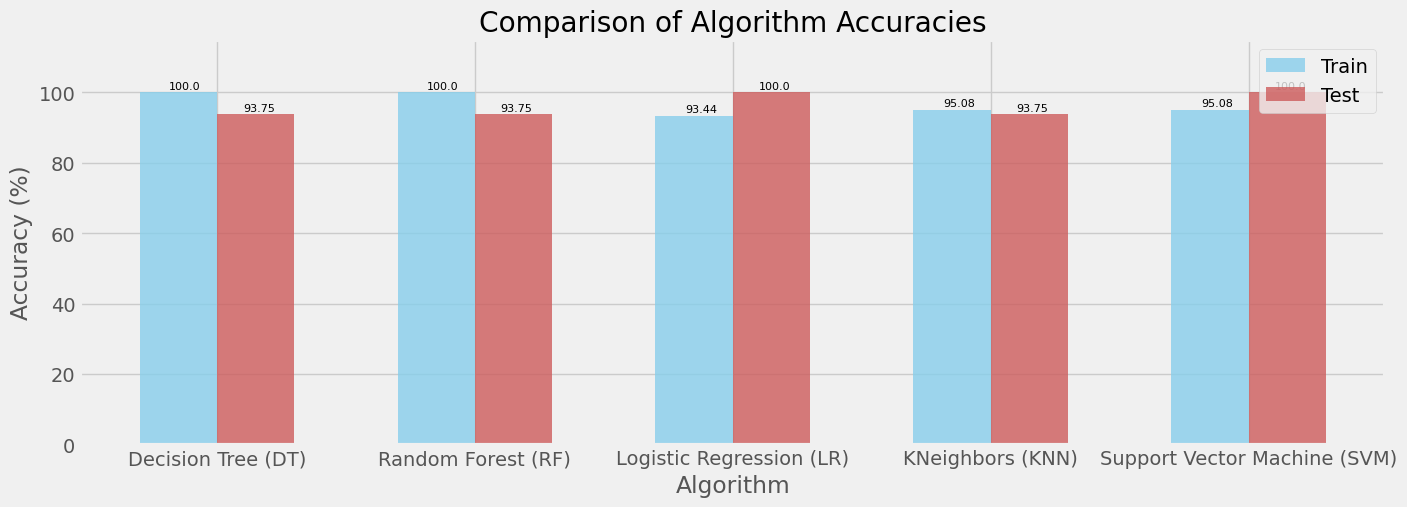

In [66]:
# Define the data to plot
n_groups = 5
algorithms = ('Decision Tree (DT)', 'Random Forest (RF)', 'Logistic Regression (LR)', 'KNeighbors (KNN)', 'Support Vector Machine (SVM)')

train_accuracy = (
    accuracy_score(y_train, classifierDT.predict(X_train)) * 100,
    accuracy_score(y_train, classifierRF.predict(X_train)) * 100,
    accuracy_score(y_train, classifierLR.predict(X_train)) * 100,
    accuracy_score(y_train, classifierKNN.predict(X_train)) * 100,
    accuracy_score(y_train, classifierSVM.predict(X_train)) * 100
)

test_accuracy = (
    accuracy_score(y_test, y_predDT) * 100,
    accuracy_score(y_test, y_predRF) * 100,
    accuracy_score(y_test, y_predLR) * 100,
    accuracy_score(y_test, y_predKNN) * 100,
    accuracy_score(y_test, y_predSVM) * 100
)

# Create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, train_accuracy, bar_width, alpha=opacity, color='SkyBlue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha=opacity, color='IndianRed', label='Test')

plt.xlabel('Algorithm')  # x-axis label
plt.ylabel('Accuracy (%)')  # y-axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies')  # plot title
plt.xticks(index + bar_width * 0.5, algorithms)  # x-axis data labels
plt.legend(loc='upper right')  # show legend

for index, data in enumerate(train_accuracy):
    plt.text(x=index - 0.035, y=data + 1, s=round(data, 2), fontdict=dict(fontsize=8))

for index, data in enumerate(test_accuracy):
    plt.text(x=index + 0.25, y=data + 1, s=round(data, 2), fontdict=dict(fontsize=8))

plt.show()


#### 13.2)  Metrices Compasion

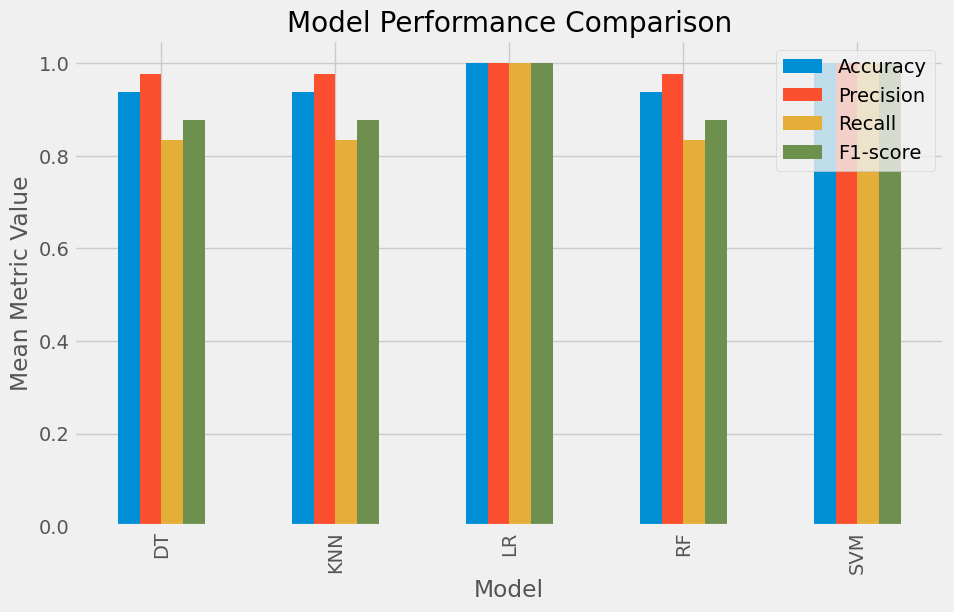

In [67]:
mean_metrics = comparision.groupby('Model').mean()

mean_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Metric Value')
plt.show()

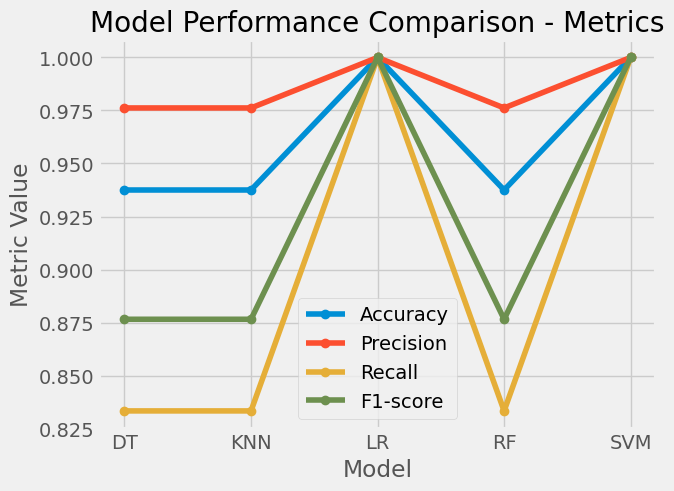

In [68]:
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
for metric in metric_names:
    plt.plot(mean_metrics.index, mean_metrics[metric], marker='o', label=metric)

plt.title('Model Performance Comparison - Metrics')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

### 13.4) Comaprision of Models Using Cross-Validation Scores

In [69]:
from sklearn.model_selection import cross_val_score
import pandas as pd

models = [
    ('DT', classifierDT),
    ('RF', classifierRF),
    ('LR', classifierLR),
    ('KNN', classifierKNN),
    ('SVM', classifierSVM)
]

cv_scores = []
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores)

cv_scores_df = pd.DataFrame(cv_scores, columns=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
cv_scores_df['Model'] = [name for name, _ in models]

cv_scores_df['Average'] = cv_scores_df.iloc[:, :-1].mean(axis=1)
cv_scores_df

Fold 1    Fold 2  Fold 3    Fold 4    Fold 5 Model   Average
0  0.846154  1.000000     1.0  1.000000  0.833333    DT  0.935897
1  0.846154  0.916667     1.0  1.000000  1.000000    RF  0.952564
2  0.692308  0.916667     1.0  0.833333  1.000000    LR  0.888462
3  0.846154  0.916667     1.0  0.833333  0.916667   KNN  0.902564
4  0.846154  0.916667     1.0  0.916667  0.916667   SVM  0.919231

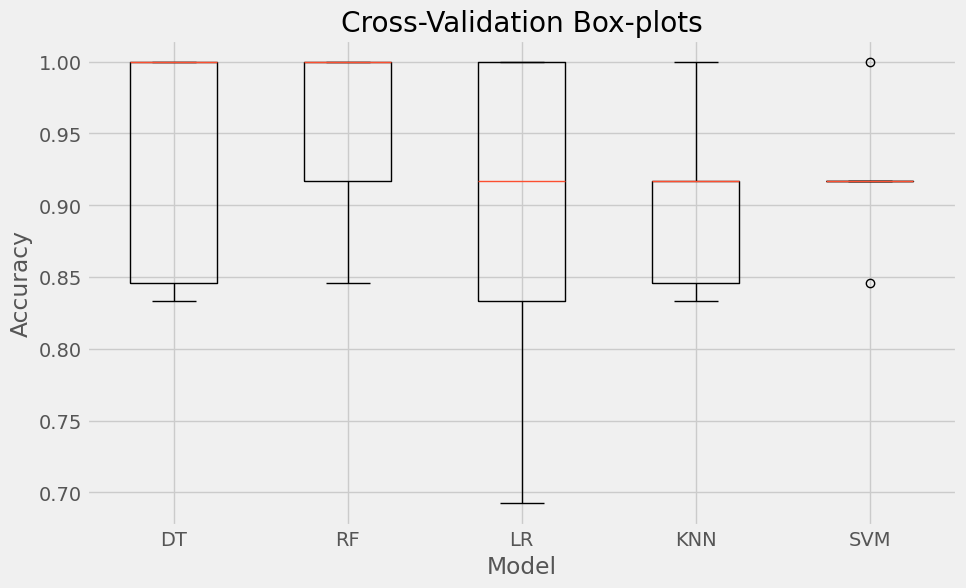

In [70]:
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores, labels=[name for name, _ in models])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Box-plots')
plt.show()

- After cross validation we can now confirm that DT and RF models have the best performance metrics, thus any of two best models (DT or RF) and the chosen model for task

# 14. Model Interpretation

- The final crucial step of a data science project is the interpretation of the models and data, in terms of its predictive power and thus its ability to generalise unseen future data.. 

In [71]:
# identify the important features in RF
imp = classifierRF.feature_importances_
imp

array([0.01627606, 0.03098069, 0.2826581 , 0.04225929, 0.06340741,
       0.2306591 , 0.26157616, 0.07218319])

In [72]:
# combine list of symptoms and their feature importance into a 2D array
columns = merged_dataset.columns[:8]
column_names = ['Features', 'importance']
ed1_train = np.vstack((columns, imp)).T
ed1_train = pd.DataFrame(ed1_train, columns = column_names)
ed1_train

Features importance
0            Corruption index   0.016276
1               Annual income   0.030981
2                Rank_in_2022   0.282658
3                   Year_2000   0.042259
4                   Year_2007   0.063407
5                   Year_2014   0.230659
6                   Year_2022   0.261576
7  Absolute change since 2014   0.072183

- Taking all of these into consideration, a minimum threshold for feature importance is set in order to identify features of low importance, and thus can be excluded from the final predictive model.

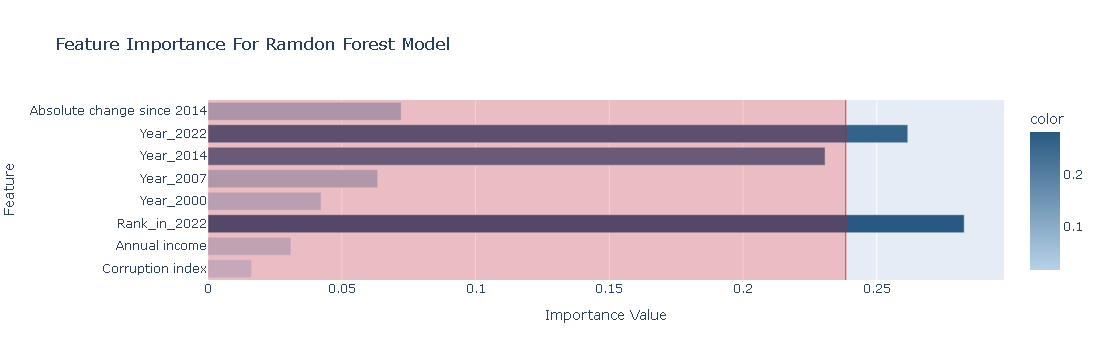

In [74]:
coefficients = classifierRF.feature_importances_

# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Ramdon Forest Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

In [75]:
import numpy
# identify features with feature importance values below the minimum threshold
highest_importance_features = numpy.array(ed1_train.Features[np.abs(coefficients) >= importance_threshold])
columns = list(highest_importance_features)
columns

['Rank_in_2022', 'Year_2022']

- The feature 'Rank_in_2022' is found to have the significantly largtest preditive power of 0.307407, out the 8 predictors

- On the other hand, the low importance features are identified below.

In [76]:
import numpy
# identify features with feature importance values below the minimum threshold
low_importance_features = numpy.array(ed1_train.Features[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['Corruption index',
 'Annual income',
 'Year_2000',
 'Year_2007',
 'Year_2014',
 'Absolute change since 2014']

- These low importance features are dropped.

In [77]:
# Define the columns you want to drop
low_importance_features = [
    'Annual income',
 'Rank_in_2022',
 'Year_2000',
 'Year_2007',
 'Year_2014',
 'Year_2022',
 'Absolute change since 2014'
]

# Print existing columns in the DataFrame
print("Existing columns in the dataset:")
print(merged_dataset.columns)

# Drop columns if they exist in the DataFrame
for feature in low_importance_features:
    if feature in merged_dataset.columns:
        merged_dataset.drop(feature, axis=1, inplace=True)
    else:
        print(f"Warning: '{feature}' not found in DataFrame columns")

# Display the updated DataFrame info
merged_dataset.info()

Existing columns in the dataset:
Index(['Corruption index', 'Annual income', 'Rank_in_2022', 'Year_2000',
       'Year_2007', 'Year_2014', 'Year_2022', 'Absolute change since 2014',
       'Percent change since 2014', 'Average_GHI', 'Rank_Class_Num',
       'Corruption_Level'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Corruption index           77 non-null     int64   
 1   Percent change since 2014  77 non-null     float64 
 2   Average_GHI                77 non-null     float64 
 3   Rank_Class_Num             77 non-null     category
 4   Corruption_Level           77 non-null     category
dtypes: category(2), float64(2), int64(1)
memory usage: 2.3 KB


- The final datasets contains 4 columns of predictors, out of the original 7. These are fed into the LR model with the parameter of the criterion of entropy, and the minimum number of 2 leaves. The performance metrics of test accuracy, precision, recall, and F1-score are measured again for this new model. 

In [78]:
# split dataset into attributes and labels
X_train_ = merged_dataset.iloc[:, :-1].values # the training attributes
y_train_ = merged_dataset.iloc[:, 4].values # the training labels
X_test_ = merged_dataset.iloc[:, :-1].values # the testing attributes
y_test_ = merged_dataset.iloc[:, 4].values # the testing labels

# using RF classifier
classifierRF_final = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF_final.fit(X_train_, y_train_)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [80]:
# for RF model

y_predlr_final = classifierRF_final.predict(X_test_)

print("Ramdon Forest:")
rf_accuracy_final = accuracy_score(y_test_, y_predlr_final)
rf_precision_final = precision_score(y_test_, y_predlr_final, average='macro')
rf_recall_final = recall_score(y_test_, y_predlr_final, average='macro')
rf_f1_final = f1_score(y_test_, y_predlr_final, average='macro')

print("\nAccuracy:", rf_accuracy_final)
print("\nPrecision:", rf_precision_final)
print("\nRecall:", rf_recall_final)
print("\nF1-score:", rf_f1_final)

# using confusion matrix
print(classification_report(y_test_, y_predlr_final))

# using accuracy performance metric
print("Train Accuracy score of Random Forest as the Deployment Model: ", accuracy_score(y_train_, classifierRF_final.predict(X_train_)))
print("Test Accuracy score of Random Forest as the Deployment Model: ", accuracy_score(y_test_, y_predlr_final))

Ramdon Forest:

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1-score: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        68
         Low       1.00      1.00      1.00         2
      Medium       1.00      1.00      1.00         7

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77

Train Accuracy score of Random Forest as the Deployment Model:  1.0
Test Accuracy score of Random Forest as the Deployment Model:  1.0


- The RF has shown an imporvment in terms of perforamces and accuracy it has increased in accuracy.
- Therefore, the RF model is now ready to be deployed to predict new value instances. To do so, a data frame is created to describe the characteristics of a number of ranking classes based on the features.
- These new data instances will be passed to RF model classifier to predict its target class label of Rank_Class_Num

In [81]:
# new data on 6 attributes
newdata = [[1, 0, 2, 0 ]]

# compute probabilities of assigning to each of the classes of prognosis
probaRF = classifierRF_final.predict_proba(newdata)
probaRF.round(4) # round probabilities to four decimal places, if applicable

array([[0.0492, 0.5177, 0.4331]])

In [82]:
# Example category_mapping dictionary (adjust as needed)
category_mapping = {
    'Class0': 0,
    'Class1': 1,
    'Class2': 2
}

In [83]:
# Reverse the 'category_mapping' dictionary to map back from numerical labels to class names
reverse_class_labels = {v: k for k, v in category_mapping.items()}

In [84]:
# Get the index of the class with the highest probability
predicted_index = np.argmax(probaRF[0])

# Map the index back to the class label
predicted_class = reverse_class_labels[predicted_index]

# Create a one-hot encoded array of zeros with length equal to the number of classes
one_hot_encoded_features = np.zeros(len(category_mapping))

# Set the index corresponding to the predicted class to 1
one_hot_encoded_features[category_mapping[predicted_class]] = 1

In [85]:
# Output the one-hot encoded array and the predicted class label
print("One-hot encoded features:\n", one_hot_encoded_features.reshape(1, -1))
print("\nPredicted class label:\n", np.array([predicted_class], dtype=object))

One-hot encoded features:
 [[0. 1. 0.]]

Predicted class label:
 ['Class1']


- The predicted class for the specified example is assigned as "Class1" (Medium Rank:1) ie Moderately nourished countries, as its probability is the highest among that for the other classes of Rank_Class. It is also safe to intepret this result as having 100% accuracy and recall, and 100% precision and F1-score, based on the RF model's performance metrics.

- Possible improvements can be to include other strong predictors of by exploring for more countries, such as other features outside of the aforementioned. These predictors can be very relevant and thus useful to include in the model design.

## **Thank you !**